<a href="https://colab.research.google.com/github/abhilashhn1993/depression-assessment-on-twitter/blob/Dragon/Code/LIWC_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import re
import string
import pandas as pd
import numpy as np
import datetime
import os
import pandas as pd
from collections import Counter

In [103]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

In [ ]:
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Control_Dep_Only_LIWC_Features.xlsx to Control_Dep_Only_LIWC_Features.xlsx


In [106]:
import io
df_all = pd.read_excel(io.BytesIO(uploaded['Control_Dep_Only_LIWC_Features.xlsx']), sheet_name='CG_Dep_All_LIWC_features')
df_sig10 = pd.read_excel(io.BytesIO(uploaded['Control_Dep_Only_LIWC_Features.xlsx']), sheet_name='CG_Dep_5-10%_LIWC_features')
df_sig5 = pd.read_excel(io.BytesIO(uploaded['Control_Dep_Only_LIWC_Features.xlsx']), sheet_name='CG_Dep_Only_5%_LIWC_features')
df_sig5_chosen = pd.read_excel(io.BytesIO(uploaded['Control_Dep_Only_LIWC_Features.xlsx']), sheet_name='CG_Dep_5%_chosen_LIWC_features')

**All LIWC features**

In [107]:
df_all.head()

,Twitter_handle,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,...,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,Target
0,__Siiwe,4668,29.07,61.56,53.10,32.00,4668,12.72,90.47,55.01,19.75,13.45,7.35,0.75,2.66,1.63,1.07,6.30,4.61,10.26,10.30,6.58,4.88,2.01,18.92,3.45,1.48,2.57,0.84,1.69,6.36,3.34,2.98,0.36,1.26,0.81,13.43,0.71,1.37,1.44,...,2.29,2.19,2.29,1.86,3.64,2.91,1.39,0.77,0.58,2.63,0.84,0.96,0.32,0.56,7.50,2.55,1.46,2.40,1.33,0.49,3.68,13.41,0.99,12.06,1.71,4.84,5.66,2.27,0.94,0.69,1.31,0.39,0.49,2.46,0.90,1.37,0.24,0.21,0.00,1
1,_301yung,6755,56.31,51.66,66.39,28.97,6755,11.09,85.68,49.74,17.39,11.98,7.09,0.44,3.33,0.58,0.53,5.40,5.23,11.67,5.76,6.10,4.69,1.67,15.43,4.17,1.73,2.03,0.70,2.01,9.40,4.74,4.54,0.38,2.37,0.81,10.57,0.47,0.31,0.67,...,1.72,1.89,2.69,1.98,2.65,2.75,1.01,0.87,0.84,3.63,1.26,0.96,0.71,0.46,7.77,2.01,1.21,2.38,2.29,0.59,4.06,9.39,1.36,14.26,2.49,6.65,5.79,0.81,1.13,0.37,0.49,0.62,0.24,5.91,2.52,3.08,0.16,0.18,0.09,1
2,_illust0907,3563,51.88,62.97,36.23,69.17,3563,16.67,75.75,43.25,15.80,10.95,5.64,0.73,2.95,0.59,1.07,4.86,3.73,8.76,5.33,6.12,4.80,0.73,13.02,3.48,1.15,1.38,0.56,1.96,7.97,5.02,2.72,0.22,0.93,0.95,9.46,0.59,0.39,1.26,...,1.40,1.63,2.08,1.54,2.36,3.40,1.66,0.79,0.84,2.58,1.09,0.73,0.31,0.34,6.06,2.13,1.29,1.49,1.71,0.34,2.98,7.75,1.91,12.10,1.63,4.29,6.51,1.26,1.43,0.28,0.39,0.48,0.20,5.33,1.09,3.54,0.42,0.67,0.08,1
3,_niebohater,1054,54.01,35.55,77.44,80.72,1054,14.61,83.87,47.91,16.79,11.67,9.01,0.57,1.61,0.19,0.28,5.12,5.41,9.77,4.74,6.45,5.31,1.42,13.38,5.88,3.04,1.14,0.47,1.90,7.97,5.50,2.47,0.38,0.57,0.66,8.54,0.00,0.28,0.19,...,1.42,1.52,2.66,1.90,3.80,4.17,1.90,1.23,0.85,1.99,0.66,0.66,0.19,0.19,6.64,3.04,1.23,1.04,1.14,0.66,2.28,10.34,1.14,11.39,0.85,4.36,6.07,1.14,2.56,0.00,0.19,0.19,0.28,2.37,0.19,0.76,0.95,0.38,0.19,1
4,_Roxiesaunders,5248,26.86,56.29,58.77,51.82,5248,9.74,88.26,49.31,19.84,14.18,7.72,0.51,5.05,0.63,0.27,5.66,2.67,9.05,7.81,7.87,4.08,1.71,18.64,5.70,2.15,1.85,0.63,1.68,13.72,7.43,6.04,0.38,3.91,0.44,11.24,0.34,0.44,0.69,...,1.12,2.12,2.06,2.21,1.96,2.84,1.03,0.74,1.01,5.96,1.60,0.93,1.92,0.50,8.96,3.77,0.91,1.64,2.61,0.69,3.41,13.41,2.17,13.24,2.10,4.69,7.16,0.97,1.24,0.30,0.36,0.25,0.13,8.73,3.83,3.51,1.03,0.84,0.06,1


In [108]:
#Leave out Twitter_handle column from the classifier 
df_all = df_all.drop(['Twitter_handle'], axis=1)

In [109]:
features_for_modeling = list(range(0, df_all.shape[1]-1))

In [110]:
#Seperate Train and target from the dataframe
df_all_train = df_all.iloc[:,features_for_modeling]
df_all_train.head()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,...,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,4668,29.07,61.56,53.10,32.00,4668,12.72,90.47,55.01,19.75,13.45,7.35,0.75,2.66,1.63,1.07,6.30,4.61,10.26,10.30,6.58,4.88,2.01,18.92,3.45,1.48,2.57,0.84,1.69,6.36,3.34,2.98,0.36,1.26,0.81,13.43,0.71,1.37,1.44,2.06,...,2.23,2.29,2.19,2.29,1.86,3.64,2.91,1.39,0.77,0.58,2.63,0.84,0.96,0.32,0.56,7.50,2.55,1.46,2.40,1.33,0.49,3.68,13.41,0.99,12.06,1.71,4.84,5.66,2.27,0.94,0.69,1.31,0.39,0.49,2.46,0.90,1.37,0.24,0.21,0.00
1,6755,56.31,51.66,66.39,28.97,6755,11.09,85.68,49.74,17.39,11.98,7.09,0.44,3.33,0.58,0.53,5.40,5.23,11.67,5.76,6.10,4.69,1.67,15.43,4.17,1.73,2.03,0.70,2.01,9.40,4.74,4.54,0.38,2.37,0.81,10.57,0.47,0.31,0.67,1.38,...,2.01,1.72,1.89,2.69,1.98,2.65,2.75,1.01,0.87,0.84,3.63,1.26,0.96,0.71,0.46,7.77,2.01,1.21,2.38,2.29,0.59,4.06,9.39,1.36,14.26,2.49,6.65,5.79,0.81,1.13,0.37,0.49,0.62,0.24,5.91,2.52,3.08,0.16,0.18,0.09
2,3563,51.88,62.97,36.23,69.17,3563,16.67,75.75,43.25,15.80,10.95,5.64,0.73,2.95,0.59,1.07,4.86,3.73,8.76,5.33,6.12,4.80,0.73,13.02,3.48,1.15,1.38,0.56,1.96,7.97,5.02,2.72,0.22,0.93,0.95,9.46,0.59,0.39,1.26,0.25,...,1.01,1.40,1.63,2.08,1.54,2.36,3.40,1.66,0.79,0.84,2.58,1.09,0.73,0.31,0.34,6.06,2.13,1.29,1.49,1.71,0.34,2.98,7.75,1.91,12.10,1.63,4.29,6.51,1.26,1.43,0.28,0.39,0.48,0.20,5.33,1.09,3.54,0.42,0.67,0.08
3,1054,54.01,35.55,77.44,80.72,1054,14.61,83.87,47.91,16.79,11.67,9.01,0.57,1.61,0.19,0.28,5.12,5.41,9.77,4.74,6.45,5.31,1.42,13.38,5.88,3.04,1.14,0.47,1.90,7.97,5.50,2.47,0.38,0.57,0.66,8.54,0.00,0.28,0.19,0.57,...,3.04,1.42,1.52,2.66,1.90,3.80,4.17,1.90,1.23,0.85,1.99,0.66,0.66,0.19,0.19,6.64,3.04,1.23,1.04,1.14,0.66,2.28,10.34,1.14,11.39,0.85,4.36,6.07,1.14,2.56,0.00,0.19,0.19,0.28,2.37,0.19,0.76,0.95,0.38,0.19
4,5248,26.86,56.29,58.77,51.82,5248,9.74,88.26,49.31,19.84,14.18,7.72,0.51,5.05,0.63,0.27,5.66,2.67,9.05,7.81,7.87,4.08,1.71,18.64,5.70,2.15,1.85,0.63,1.68,13.72,7.43,6.04,0.38,3.91,0.44,11.24,0.34,0.44,0.69,0.34,...,2.15,1.12,2.12,2.06,2.21,1.96,2.84,1.03,0.74,1.01,5.96,1.60,0.93,1.92,0.50,8.96,3.77,0.91,1.64,2.61,0.69,3.41,13.41,2.17,13.24,2.10,4.69,7.16,0.97,1.24,0.30,0.36,0.25,0.13,8.73,3.83,3.51,1.03,0.84,0.06


In [111]:
df_all_target = df_all.iloc[:,[df_all.shape[1]-1]]
df_all_target.head()

,Target
0,1
1,1
2,1
3,1
4,1


**SVM Model with linear kernel**

In [112]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_all_train,df_all_target,test_size=0.3)
sum(Test_Y['Target'] == 1)

67

In [113]:
Train_Y.Target.value_counts()

1    163
0    159
Name: Target, dtype: int64

In [116]:
svclassifier = SVC(C= 1, kernel='linear', degree=3, gamma="auto")
svclassifier.fit(Train_X, Train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [117]:
# Make prediction
y_pred = svclassifier.predict(Test_X)
# Evaluate our model
print("Recall :",recall_score(Test_Y['Target'],y_pred),"Accuracy :",accuracy_score(Test_Y['Target'],y_pred))

Recall : 0.7611940298507462 Accuracy : 0.7463768115942029


**Logistic Regression**

In [118]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(Train_X, Train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
y_pred = logreg.predict(Test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(Test_X, Test_Y)))

Accuracy of logistic regression classifier on test set: 0.76


In [120]:
print(classification_report(Test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        71
           1       0.75      0.76      0.76        67

    accuracy                           0.76       138
   macro avg       0.76      0.76      0.76       138
weighted avg       0.76      0.76      0.76       138



In [121]:
precision, recall, fscore, support = score(Test_Y, y_pred)
print((recall))

[0.76056338 0.76119403]


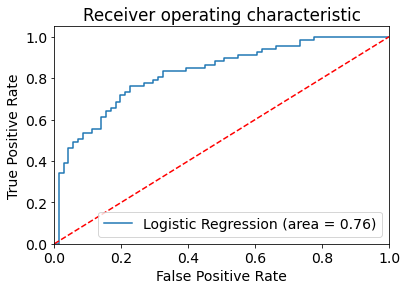

In [122]:
logit_roc_auc = roc_auc_score(Test_Y, logreg.predict(Test_X))
fpr, tpr, thresholds = roc_curve(Test_Y, logreg.predict_proba(Test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**LIWC features with 10% significance level**

In [123]:
df_sig10.head()

,Twitter_handle,WC,Analytic,Clout,Authentic,Tone,WPS,Dic,function,pronoun,ppron,i,shehe,they,prep,auxverb,adverb,conj,verb,adj,compare,number,quant,affect,negemo,anx,anger,sad,friend,cogproc,insight,cause,discrep,tentat,certain,differ,feel,bio,body,health,sexual,affiliation,achieve,power,risk,focuspast,focuspresent,focusfuture,time,death,informal,swear,filler,Target
0,__Siiwe,4668,29.07,61.56,53.10,32.00,4668,90.47,55.01,19.75,13.45,7.35,1.63,1.07,10.26,10.30,6.58,4.88,18.92,3.45,1.48,0.84,1.69,6.36,2.98,0.36,1.26,0.81,1.37,12.55,2.23,2.29,2.19,2.29,1.86,3.64,0.58,2.63,0.84,0.96,0.32,2.55,1.46,2.40,0.49,3.68,13.41,0.99,5.66,0.49,2.46,0.90,0.00,1
1,_301yung,6755,56.31,51.66,66.39,28.97,6755,85.68,49.74,17.39,11.98,7.09,0.58,0.53,11.67,5.76,6.10,4.69,15.43,4.17,1.73,0.70,2.01,9.40,4.54,0.38,2.37,0.81,0.31,11.47,2.01,1.72,1.89,2.69,1.98,2.65,0.84,3.63,1.26,0.96,0.71,2.01,1.21,2.38,0.59,4.06,9.39,1.36,5.79,0.24,5.91,2.52,0.09,1
2,_illust0907,3563,51.88,62.97,36.23,69.17,3563,75.75,43.25,15.80,10.95,5.64,0.59,1.07,8.76,5.33,6.12,4.80,13.02,3.48,1.15,0.56,1.96,7.97,2.72,0.22,0.93,0.95,0.39,8.67,1.01,1.40,1.63,2.08,1.54,2.36,0.84,2.58,1.09,0.73,0.31,2.13,1.29,1.49,0.34,2.98,7.75,1.91,6.51,0.20,5.33,1.09,0.08,1
3,_niebohater,1054,54.01,35.55,77.44,80.72,1054,83.87,47.91,16.79,11.67,9.01,0.19,0.28,9.77,4.74,6.45,5.31,13.38,5.88,3.04,0.47,1.90,7.97,2.47,0.38,0.57,0.66,0.28,13.09,3.04,1.42,1.52,2.66,1.90,3.80,0.85,1.99,0.66,0.66,0.19,3.04,1.23,1.04,0.66,2.28,10.34,1.14,6.07,0.28,2.37,0.19,0.19,1
4,_Roxiesaunders,5248,26.86,56.29,58.77,51.82,5248,88.26,49.31,19.84,14.18,7.72,0.63,0.27,9.05,7.81,7.87,4.08,18.64,5.70,2.15,0.63,1.68,13.72,6.04,0.38,3.91,0.44,0.44,10.58,2.15,1.12,2.12,2.06,2.21,1.96,1.01,5.96,1.60,0.93,1.92,3.77,0.91,1.64,0.69,3.41,13.41,2.17,7.16,0.13,8.73,3.83,0.06,1


In [124]:
#Leave out Twitter_handle column from the classifier 
df_sig10 = df_sig10.drop(['Twitter_handle'], axis=1)

In [125]:
features_for_modeling = list(range(0, df_sig10.shape[1]-1))

In [126]:
#Seperate Train and target from the dataframe
df_sig10_train = df_sig10.iloc[:,features_for_modeling]
df_sig10_train.head()

,WC,Analytic,Clout,Authentic,Tone,WPS,Dic,function,pronoun,ppron,i,shehe,they,prep,auxverb,adverb,conj,verb,adj,compare,number,quant,affect,negemo,anx,anger,sad,friend,cogproc,insight,cause,discrep,tentat,certain,differ,feel,bio,body,health,sexual,affiliation,achieve,power,risk,focuspast,focuspresent,focusfuture,time,death,informal,swear,filler
0,4668,29.07,61.56,53.10,32.00,4668,90.47,55.01,19.75,13.45,7.35,1.63,1.07,10.26,10.30,6.58,4.88,18.92,3.45,1.48,0.84,1.69,6.36,2.98,0.36,1.26,0.81,1.37,12.55,2.23,2.29,2.19,2.29,1.86,3.64,0.58,2.63,0.84,0.96,0.32,2.55,1.46,2.40,0.49,3.68,13.41,0.99,5.66,0.49,2.46,0.90,0.00
1,6755,56.31,51.66,66.39,28.97,6755,85.68,49.74,17.39,11.98,7.09,0.58,0.53,11.67,5.76,6.10,4.69,15.43,4.17,1.73,0.70,2.01,9.40,4.54,0.38,2.37,0.81,0.31,11.47,2.01,1.72,1.89,2.69,1.98,2.65,0.84,3.63,1.26,0.96,0.71,2.01,1.21,2.38,0.59,4.06,9.39,1.36,5.79,0.24,5.91,2.52,0.09
2,3563,51.88,62.97,36.23,69.17,3563,75.75,43.25,15.80,10.95,5.64,0.59,1.07,8.76,5.33,6.12,4.80,13.02,3.48,1.15,0.56,1.96,7.97,2.72,0.22,0.93,0.95,0.39,8.67,1.01,1.40,1.63,2.08,1.54,2.36,0.84,2.58,1.09,0.73,0.31,2.13,1.29,1.49,0.34,2.98,7.75,1.91,6.51,0.20,5.33,1.09,0.08
3,1054,54.01,35.55,77.44,80.72,1054,83.87,47.91,16.79,11.67,9.01,0.19,0.28,9.77,4.74,6.45,5.31,13.38,5.88,3.04,0.47,1.90,7.97,2.47,0.38,0.57,0.66,0.28,13.09,3.04,1.42,1.52,2.66,1.90,3.80,0.85,1.99,0.66,0.66,0.19,3.04,1.23,1.04,0.66,2.28,10.34,1.14,6.07,0.28,2.37,0.19,0.19
4,5248,26.86,56.29,58.77,51.82,5248,88.26,49.31,19.84,14.18,7.72,0.63,0.27,9.05,7.81,7.87,4.08,18.64,5.70,2.15,0.63,1.68,13.72,6.04,0.38,3.91,0.44,0.44,10.58,2.15,1.12,2.12,2.06,2.21,1.96,1.01,5.96,1.60,0.93,1.92,3.77,0.91,1.64,0.69,3.41,13.41,2.17,7.16,0.13,8.73,3.83,0.06


In [127]:
df_sig10_train.shape

(460, 52)

In [128]:
df_sig10_target = df_sig10.iloc[:,[df_sig10.shape[1]-1]]
df_sig10_target.head()

,Target
0,1
1,1
2,1
3,1
4,1


In [141]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_sig10_train,df_sig10_target,test_size=0.3)
sum(Test_Y['Target'] == 1)

70

In [142]:
Train_Y.Target.value_counts()

0    162
1    160
Name: Target, dtype: int64

**SVM with linear kernel**

In [143]:
svclassifier = SVC(C= 1, kernel='linear', degree=3, gamma="auto")
svclassifier.fit(Train_X, Train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [144]:
# Make prediction
y_pred = svclassifier.predict(Test_X)
# Evaluate our model
print("Recall :",recall_score(Test_Y['Target'],y_pred),"Accuracy :",accuracy_score(Test_Y['Target'],y_pred))

Recall : 0.7571428571428571 Accuracy : 0.7681159420289855


**Logistic Regression**

In [145]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(Train_X, Train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
y_pred = logreg.predict(Test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(Test_X, Test_Y)))

Accuracy of logistic regression classifier on test set: 0.79


In [147]:
print(classification_report(Test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        68
           1       0.81      0.77      0.79        70

    accuracy                           0.79       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.79      0.79      0.79       138



In [148]:
precision, recall, fscore, support = score(Test_Y, y_pred)
print((recall))

[0.80882353 0.77142857]


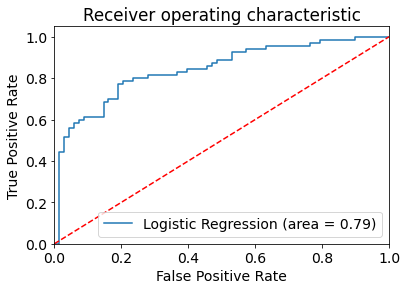

In [149]:
logit_roc_auc = roc_auc_score(Test_Y, logreg.predict(Test_X))
fpr, tpr, thresholds = roc_curve(Test_Y, logreg.predict_proba(Test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**LIWC features with 5% significane level**

In [153]:
df_sig5.head()

,WC,Analytic,Authentic,Tone,WPS,Dic,function,pronoun,ppron,i,adverb,conj,verb,compare,negemo,anx,anger,sad,friend,cogproc,insight,cause,discrep,tentat,certain,differ,feel,bio,health,sexual,risk,focuspast,focuspresent,focusfuture,time,death,Target
0,4668,29.07,53.10,32.00,4668,90.47,55.01,19.75,13.45,7.35,6.58,4.88,18.92,1.48,2.98,0.36,1.26,0.81,1.37,12.55,2.23,2.29,2.19,2.29,1.86,3.64,0.58,2.63,0.96,0.32,0.49,3.68,13.41,0.99,5.66,0.49,1
1,6755,56.31,66.39,28.97,6755,85.68,49.74,17.39,11.98,7.09,6.10,4.69,15.43,1.73,4.54,0.38,2.37,0.81,0.31,11.47,2.01,1.72,1.89,2.69,1.98,2.65,0.84,3.63,0.96,0.71,0.59,4.06,9.39,1.36,5.79,0.24,1
2,3563,51.88,36.23,69.17,3563,75.75,43.25,15.80,10.95,5.64,6.12,4.80,13.02,1.15,2.72,0.22,0.93,0.95,0.39,8.67,1.01,1.40,1.63,2.08,1.54,2.36,0.84,2.58,0.73,0.31,0.34,2.98,7.75,1.91,6.51,0.20,1
3,1054,54.01,77.44,80.72,1054,83.87,47.91,16.79,11.67,9.01,6.45,5.31,13.38,3.04,2.47,0.38,0.57,0.66,0.28,13.09,3.04,1.42,1.52,2.66,1.90,3.80,0.85,1.99,0.66,0.19,0.66,2.28,10.34,1.14,6.07,0.28,1
4,5248,26.86,58.77,51.82,5248,88.26,49.31,19.84,14.18,7.72,7.87,4.08,18.64,2.15,6.04,0.38,3.91,0.44,0.44,10.58,2.15,1.12,2.12,2.06,2.21,1.96,1.01,5.96,0.93,1.92,0.69,3.41,13.41,2.17,7.16,0.13,1


In [ ]:
#Leave out Twitter_handle column from the classifier 
df_sig5 = df_sig5.drop(['Twitter_handle'], axis=1)

In [154]:
features_for_modeling = list(range(0, df_sig5.shape[1]-1))

In [155]:
#Seperate Train and target from the dataframe
df_sig5_train = df_sig5.iloc[:,features_for_modeling]
df_sig5_train.head()

,WC,Analytic,Authentic,Tone,WPS,Dic,function,pronoun,ppron,i,adverb,conj,verb,compare,negemo,anx,anger,sad,friend,cogproc,insight,cause,discrep,tentat,certain,differ,feel,bio,health,sexual,risk,focuspast,focuspresent,focusfuture,time,death
0,4668,29.07,53.10,32.00,4668,90.47,55.01,19.75,13.45,7.35,6.58,4.88,18.92,1.48,2.98,0.36,1.26,0.81,1.37,12.55,2.23,2.29,2.19,2.29,1.86,3.64,0.58,2.63,0.96,0.32,0.49,3.68,13.41,0.99,5.66,0.49
1,6755,56.31,66.39,28.97,6755,85.68,49.74,17.39,11.98,7.09,6.10,4.69,15.43,1.73,4.54,0.38,2.37,0.81,0.31,11.47,2.01,1.72,1.89,2.69,1.98,2.65,0.84,3.63,0.96,0.71,0.59,4.06,9.39,1.36,5.79,0.24
2,3563,51.88,36.23,69.17,3563,75.75,43.25,15.80,10.95,5.64,6.12,4.80,13.02,1.15,2.72,0.22,0.93,0.95,0.39,8.67,1.01,1.40,1.63,2.08,1.54,2.36,0.84,2.58,0.73,0.31,0.34,2.98,7.75,1.91,6.51,0.20
3,1054,54.01,77.44,80.72,1054,83.87,47.91,16.79,11.67,9.01,6.45,5.31,13.38,3.04,2.47,0.38,0.57,0.66,0.28,13.09,3.04,1.42,1.52,2.66,1.90,3.80,0.85,1.99,0.66,0.19,0.66,2.28,10.34,1.14,6.07,0.28
4,5248,26.86,58.77,51.82,5248,88.26,49.31,19.84,14.18,7.72,7.87,4.08,18.64,2.15,6.04,0.38,3.91,0.44,0.44,10.58,2.15,1.12,2.12,2.06,2.21,1.96,1.01,5.96,0.93,1.92,0.69,3.41,13.41,2.17,7.16,0.13


In [156]:
df_sig5_target = df_sig5.iloc[:,[df_sig5.shape[1]-1]]
df_sig5_target.head()

,Target
0,1
1,1
2,1
3,1
4,1


In [157]:
df_sig5_train.shape

(460, 36)

In [158]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_sig5_train,df_sig5_target,test_size=0.3)
sum(Test_Y['Target'] == 1)

70

In [159]:
Train_Y.Target.value_counts()

0    162
1    160
Name: Target, dtype: int64

**SVM with linear kernel**

In [160]:
svclassifier = SVC(C= 1, kernel='linear', degree=3, gamma="auto")
svclassifier.fit(Train_X, Train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [161]:
 # Make prediction
y_pred = svclassifier.predict(Test_X)
# Evaluate our model
print("Recall :",recall_score(Test_Y['Target'],y_pred),"Accuracy :",accuracy_score(Test_Y['Target'],y_pred))

Recall : 0.8714285714285714 Accuracy : 0.7898550724637681


**Logistic Regression**

In [162]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(Train_X, Train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
y_pred = logreg.predict(Test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(Test_X, Test_Y)))

Accuracy of logistic regression classifier on test set: 0.75


In [164]:
print(classification_report(Test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72        68
           1       0.72      0.83      0.77        70

    accuracy                           0.75       138
   macro avg       0.75      0.75      0.74       138
weighted avg       0.75      0.75      0.74       138



In [165]:
precision, recall, fscore, support = score(Test_Y, y_pred)
print((recall))

[0.66176471 0.82857143]


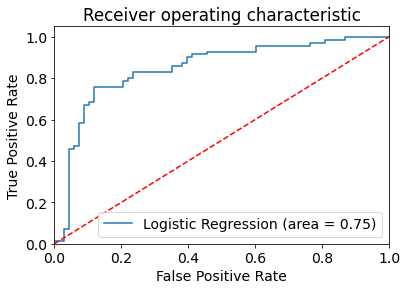

In [166]:
logit_roc_auc = roc_auc_score(Test_Y, logreg.predict(Test_X))
fpr, tpr, thresholds = roc_curve(Test_Y, logreg.predict_proba(Test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**LIWC custom chosen features with 5% significance level**

In [167]:
df_sig5_chosen.head()

,Twitter_handle,Analytic,Authentic,Tone,i,adverb,conj,verb,compare,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,health,sexual,focuspast,focuspresent,focusfuture,time,Target
0,__Siiwe,29.07,53.10,32.00,7.35,6.58,4.88,18.92,1.48,2.98,0.36,1.26,0.81,2.23,2.29,2.19,2.29,1.86,3.64,0.96,0.32,3.68,13.41,0.99,5.66,1
1,_301yung,56.31,66.39,28.97,7.09,6.10,4.69,15.43,1.73,4.54,0.38,2.37,0.81,2.01,1.72,1.89,2.69,1.98,2.65,0.96,0.71,4.06,9.39,1.36,5.79,1
2,_illust0907,51.88,36.23,69.17,5.64,6.12,4.80,13.02,1.15,2.72,0.22,0.93,0.95,1.01,1.40,1.63,2.08,1.54,2.36,0.73,0.31,2.98,7.75,1.91,6.51,1
3,_niebohater,54.01,77.44,80.72,9.01,6.45,5.31,13.38,3.04,2.47,0.38,0.57,0.66,3.04,1.42,1.52,2.66,1.90,3.80,0.66,0.19,2.28,10.34,1.14,6.07,1
4,_Roxiesaunders,26.86,58.77,51.82,7.72,7.87,4.08,18.64,2.15,6.04,0.38,3.91,0.44,2.15,1.12,2.12,2.06,2.21,1.96,0.93,1.92,3.41,13.41,2.17,7.16,1


In [168]:
#Leave out Twitter_handle column from the classifier 
df_sig5_chosen = df_sig5_chosen.drop(['Twitter_handle'], axis=1)

In [169]:
features_for_modeling = list(range(0, df_sig5_chosen.shape[1]-1))

In [170]:
#Seperate Train and target from the dataframe
df_sig5_chosen_train = df_sig5_chosen.iloc[:,features_for_modeling]
df_sig5_chosen_train.head()

,Analytic,Authentic,Tone,i,adverb,conj,verb,compare,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,health,sexual,focuspast,focuspresent,focusfuture,time
0,29.07,53.10,32.00,7.35,6.58,4.88,18.92,1.48,2.98,0.36,1.26,0.81,2.23,2.29,2.19,2.29,1.86,3.64,0.96,0.32,3.68,13.41,0.99,5.66
1,56.31,66.39,28.97,7.09,6.10,4.69,15.43,1.73,4.54,0.38,2.37,0.81,2.01,1.72,1.89,2.69,1.98,2.65,0.96,0.71,4.06,9.39,1.36,5.79
2,51.88,36.23,69.17,5.64,6.12,4.80,13.02,1.15,2.72,0.22,0.93,0.95,1.01,1.40,1.63,2.08,1.54,2.36,0.73,0.31,2.98,7.75,1.91,6.51
3,54.01,77.44,80.72,9.01,6.45,5.31,13.38,3.04,2.47,0.38,0.57,0.66,3.04,1.42,1.52,2.66,1.90,3.80,0.66,0.19,2.28,10.34,1.14,6.07
4,26.86,58.77,51.82,7.72,7.87,4.08,18.64,2.15,6.04,0.38,3.91,0.44,2.15,1.12,2.12,2.06,2.21,1.96,0.93,1.92,3.41,13.41,2.17,7.16


In [171]:
df_sig5_chosen_train.shape

(460, 24)

In [172]:
df_sig5_chosen_target = df_sig5_chosen.iloc[:,[df_sig5_chosen.shape[1]-1]]
df_sig5_chosen_target.head()

,Target
0,1
1,1
2,1
3,1
4,1


In [177]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_sig5_chosen_train,df_sig5_chosen_target,test_size=0.3)
sum(Test_Y['Target'] == 1)

68

In [178]:
Train_Y.Target.value_counts()

1    162
0    160
Name: Target, dtype: int64

In [179]:
svclassifier = SVC(C= 1, kernel='linear', degree=3, gamma="auto")
svclassifier.fit(Train_X, Train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [180]:
# Make prediction
y_pred = svclassifier.predict(Test_X)
# Evaluate our model
print("Recall :",recall_score(Test_Y['Target'],y_pred),"Accuracy :",accuracy_score(Test_Y['Target'],y_pred))

Recall : 0.8529411764705882 Accuracy : 0.7391304347826086


**Logistic Regression**

In [181]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(Train_X, Train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
y_pred = logreg.predict(Test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(Test_X, Test_Y)))

Accuracy of logistic regression classifier on test set: 0.72


In [183]:
print(classification_report(Test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        70
           1       0.69      0.81      0.74        68

    accuracy                           0.72       138
   macro avg       0.73      0.73      0.72       138
weighted avg       0.73      0.72      0.72       138



In [184]:
precision, recall, fscore, support = score(Test_Y, y_pred)
print((recall))

[0.64285714 0.80882353]


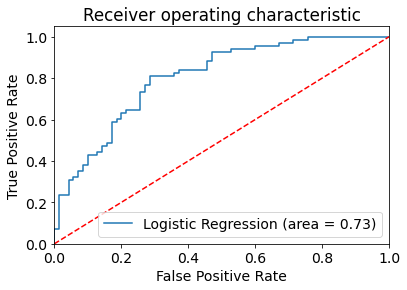

In [185]:
logit_roc_auc = roc_auc_score(Test_Y, logreg.predict(Test_X))
fpr, tpr, thresholds = roc_curve(Test_Y, logreg.predict_proba(Test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()